In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set_style('white')
sns.set_context('paper')
sns.set()
import random
from sklearn.manifold import TSNE
from utils.utils import find_norm_params

legend_size = 14

In [15]:
s = '5' # most from 4, 5 for 1,1, 2
models = ['results_Mechanistic','results_MechanisticGauss']
selected = models[0]
data_path = "data/challenge/s{}/{}/".format(s, selected)

shedding = np.load(data_path + 'shedding.npy')
symptoms = np.load(data_path + 'symptoms.npy')
y_bf = np.load(data_path + 'observations.npy')
times = np.load(data_path + 'times.npy')


mu_50_post_bf = np.load(data_path + 'mu_50_post.npy')
mu_25_post_bf = np.load(data_path + 'mu_25_post.npy')
mu_75_post_bf = np.load(data_path + 'mu_75_post.npy')

x_post = np.load(data_path + 'solution_xt_post.npy')
x_post = np.swapaxes(x_post,1,2)

mu_50_prior_bf = np.load(data_path + 'mu_50_prior.npy')
mu_25_prior_bf = np.load(data_path + 'mu_25_prior.npy')
mu_75_prior_bf = np.load(data_path + 'mu_75_prior.npy')
x_prior = np.load(data_path + 'solution_xt_prior.npy')
x_prior = np.swapaxes(x_prior,1,2)

print("data_path: ", data_path)

data_path:  data/challenge/s5/results_Mechanistic/


In [16]:
print(shedding.shape)
print(symptoms.shape)
print(y_bf.shape)
print(times.shape)
print(mu_75_prior_bf.shape)
print(x_post.shape)
outcomes = np.concatenate((shedding,symptoms), axis=1)
print(outcomes.shape)

(7, 1)
(7, 1)
(7, 4, 142)
(142,)
(7, 4, 142)
(7, 5, 142)
(7, 2)


In [17]:
## Renormalize data

data_norm_params = find_norm_params(np.swapaxes(y_bf,1,2)) 
min_val = data_norm_params["min"]
max_val = data_norm_params["max"]


def re_normalize(data):
    sample = np.swapaxes(data,1,2)
   # print("sample: ", sample.shape)
    new_sample = np.zeros(sample.shape)
    #print("before: ", new_sample.shape)
    for feature in range(min_val.shape[0]):
        new_sample[:,:, feature] = (sample[:, :, feature] - min_val[feature]) / (
                    max_val[feature] - min_val[feature])
        #print( new_sample[:, :, feature])
    new_sample = np.swapaxes(new_sample,1,2)
    #print("after: ", new_sample.shape)
    return new_sample

mu_50_post =  re_normalize(mu_50_post_bf)
mu_25_post =  re_normalize(mu_25_post_bf)
mu_75_post =  re_normalize(mu_75_post_bf)


mu_50_prior = re_normalize(mu_50_prior_bf)
mu_25_prior =  re_normalize(mu_25_prior_bf)
mu_75_prior =  re_normalize(mu_75_prior_bf)

y =  re_normalize(y_bf)


print(mu_50_post.shape)
print(np.max(y), np.min(y))
print(np.max(mu_50_post), np.min(mu_50_post))

print(outcomes)


find_norm_params:  (7, 142, 4)
max_val:  [0.89978111 0.80684257 2.12642002 0.97729176] min_val:  [0.01899851 0.06201001 0.         0.10918851]
(7, 4, 142)
1.0 0.0
0.8562329411506653 -0.0004997701616957784
[[0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]]


## Plot Shedding/Symptoms at all times

<Figure size 640x480 with 0 Axes>

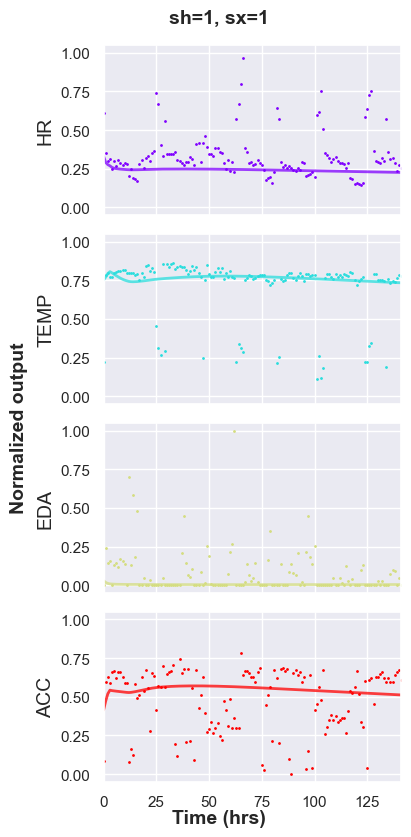

In [18]:
plt.clf()
from matplotlib import cm
mu_50 = mu_50_post
mu_25 = mu_25_post
mu_75 = mu_75_post


colors = [cm.rainbow(x) for x in np.linspace(0, 1, 4)] 
for pid in range(mu_50.shape[0]):
    if pid +1 in [2, 3, 5, 6] and s=='4':
        continue
    elif pid +1 != 4 and s=='5':
        continue
        
    fig, axs = plt.subplots(4, 1, sharex=True, sharey=True, figsize=(4, 8))
    fs = 14
    for r in range(4):
        label =outcomes[pid]
        axs[r].plot(times, mu_50[pid, :, :][r], '-', color=colors[r],  lw=2, alpha=0.75)
        axs[r].plot(times, y[pid, :, :][r], '.', color=colors[r],
                                   markersize=2, alpha=1)
        axs[r].set_xlim(0.0, max(times) + 0.01)
        axs[r].set_ylim(-0.05, 1.05)
         
        
    rows = ['HR', 'TEMP', 'EDA', 'ACC']
    cols = 'sh={}'.format(int(label[0])) + ', sx={}'.format(int(label[1]))
#     for ax, col in zip(axs[0], cols):
   


    for ax, row in zip(axs[:], rows):
        ax.set_ylabel(row, fontsize=fs)

    fig.text(0, 0.5, "Normalized output", ha="center", va="center", rotation=90, fontsize=fs, fontweight='bold')
    fig.text(0.5, 0, "Time (hrs)", ha="center", va="bottom", fontsize=fs, fontweight='bold')
    fig.text(0.5, 1, cols, ha="center", va="bottom", fontsize=fs, fontweight='bold')
    #fig.legend(bbox_to_anchor=(1.02,1), fontsize=fs-2)
    fig.tight_layout()
    fig.tight_layout()